In [22]:
import os
import os.path
import cv2
import math
import numpy as np
from PIL import Image 
import os 
from pathlib import Path
import cv2
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import pylab as pl
from sklearn.metrics import confusion_matrix,accuracy_score
import pydicom
from tqdm import tqdm
import pandas as pd
from matplotlib import pyplot as plt
import os
import time
import numpy as np
import cv2
import numpy as np

import logging

In [7]:
class HomomorphicFilter:
    """Homomorphic filter implemented with diferents filters and an option to an external filter.
    
    High-frequency filters implemented:
        butterworth
        gaussian
    Attributes:
        a, b: Floats used on emphasis filter:
            H = a + b*H
        
        .
    """

    def __init__(self, a = 0.5, b = 1.5):
        self.a = float(a)
        self.b = float(b)

    # Filters
    def __butterworth_filter(self, I_shape, filter_params):
        P = I_shape[0]/2
        Q = I_shape[1]/2
        U, V = np.meshgrid(range(I_shape[0]), range(I_shape[1]), sparse=False, indexing='ij')
        Duv = (((U-P)**2+(V-Q)**2)).astype(float)
        H = 1/(1+(Duv/filter_params[0]**2)**filter_params[1])
        return (1 - H)

    def __gaussian_filter(self, I_shape, filter_params):
        P = I_shape[0]/2
        Q = I_shape[1]/2
        H = np.zeros(I_shape)
        U, V = np.meshgrid(range(I_shape[0]), range(I_shape[1]), sparse=False, indexing='ij')
        Duv = (((U-P)**2+(V-Q)**2)).astype(float)
        H = np.exp((-Duv/(2*(filter_params[0])**2)))
        return (1 - H)

    # Methods
    def __apply_filter(self, I, H):
        H = np.fft.fftshift(H)
        I_filtered = (self.a + self.b*H)*I
        return I_filtered

    def filter(self, I, filter_params, filter='butterworth', H = None):
        """
        Method to apply homormophic filter on an image
        Attributes:
            I: Single channel image
            filter_params: Parameters to be used on filters:
                butterworth:
                    filter_params[0]: Cutoff frequency 
                    filter_params[1]: Order of filter
                gaussian:
                    filter_params[0]: Cutoff frequency
            filter: Choose of the filter, options:
                butterworth
                gaussian
                external
            H: Used to pass external filter
        """

        #  Validating image
        if len(I.shape) is not 2:
            raise Exception('Improper image')

        # Take the image to log domain and then to frequency domain 
        I_log = np.log1p(np.array(I, dtype="float"))
        I_fft = np.fft.fft2(I_log)

        # Filters
        if filter=='butterworth':
            H = self.__butterworth_filter(I_shape = I_fft.shape, filter_params = filter_params)
        elif filter=='gaussian':
            H = self.__gaussian_filter(I_shape = I_fft.shape, filter_params = filter_params)
        elif filter=='external':
            print('external')
            if len(H.shape) is not 2:
                raise Exception('Invalid external filter')
        else:
            raise Exception('Selected filter not implemented')
        
        # Apply filter on frequency domain then take the image back to spatial domain
        I_fft_filt = self.__apply_filter(I = I_fft, H = H)
        I_filt = np.fft.ifft2(I_fft_filt)
        I = np.exp(np.real(I_filt))-1
        return np.uint8(I)
# End of class HomomorphicFilter




<>:61: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:75: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:61: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:75: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_12496/3789940568.py:61: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(I.shape) is not 2:
C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_12496/3789940568.py:75: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(H.shape) is not 2:


In [8]:

def convert(image_dir, output_home, limit=None):
    i = 1
    list = os.listdir(image_dir)
    file_count = len(list)
    for f in list:
        if ("ppm" not in f) and ('png' not in f):
            continue
        if i >= file_count:
            break
        print(i)
        i += 1
        print("processing: %s" % (f))
        
        image_path = os.path.join(image_dir, f)
        img = cv2.imread(image_path)[:, :, 0]
        homo_filter = HomomorphicFilter(a = 0.75, b = 1.25)
        img_filtered = homo_filter.filter(I=img, filter_params=[30,2])
        basename = os.path.basename(image_dir)
        output_dir = os.path.join(output_home, basename)
        
        
        if not os.path.isdir(output_dir):
            os.mkdir(output_dir)
        output_file = os.path.join(output_dir, f)
        cv2.imwrite(output_file, img_filtered)
    


In [9]:

import cv2
    
input_home_dir = "E:/TrainingImages/"
output_home_dir = "E:/enhance/TrainingImagesTVH/"
limit = 2.0
    
list_dir = os.listdir(input_home_dir)
convert(input_home_dir, output_home_dir, limit=limit)

1
processing: 1.2.826.0.1.3680043.8.498.10025629581362719970278200333618114258.png
2
processing: 1.2.826.0.1.3680043.8.498.10036150326276641158002573300029848125.png
3
processing: 1.2.826.0.1.3680043.8.498.10038426859954986240523417641213777162.png
4
processing: 1.2.826.0.1.3680043.8.498.10050991192143676483577217922037244257.png
5
processing: 1.2.826.0.1.3680043.8.498.10053309524595490852815579052225336016.png
6
processing: 1.2.826.0.1.3680043.8.498.10053755320637729867508668285241208441.png
7
processing: 1.2.826.0.1.3680043.8.498.10062189329714053601496804394945741428.png
8
processing: 1.2.826.0.1.3680043.8.498.10065930002825553435161793347987832017.png
9
processing: 1.2.826.0.1.3680043.8.498.10072001800484199846734151421006166369.png
10
processing: 1.2.826.0.1.3680043.8.498.10077219503857952412254959562456136784.png
11
processing: 1.2.826.0.1.3680043.8.498.10080310665124574896848143784790467773.png
12
processing: 1.2.826.0.1.3680043.8.498.10089082474655893722076446314877509447.png
1

99
processing: 1.2.826.0.1.3680043.8.498.10863585699363872992518896098079620151.png
100
processing: 1.2.826.0.1.3680043.8.498.10873140185372483384104313397133134339.png
101
processing: 1.2.826.0.1.3680043.8.498.10888192607734246062570568056428363685.png
102
processing: 1.2.826.0.1.3680043.8.498.10905251146867407016907224680896322095.png
103
processing: 1.2.826.0.1.3680043.8.498.10917687420561210839280263439276243032.png
104
processing: 1.2.826.0.1.3680043.8.498.10921163894995839905985376916380372297.png
105
processing: 1.2.826.0.1.3680043.8.498.10928746813638613818136841615770309706.png
106
processing: 1.2.826.0.1.3680043.8.498.10937003831824770206384743431355579489.png
107
processing: 1.2.826.0.1.3680043.8.498.10948073221602469402148225458476000973.png
108
processing: 1.2.826.0.1.3680043.8.498.10950440235762027870830738147373259538.png
109
processing: 1.2.826.0.1.3680043.8.498.10952484934212595061043581682480297990.png
110
processing: 1.2.826.0.1.3680043.8.498.109536597337793057476151

196
processing: 1.2.826.0.1.3680043.8.498.11558866520660138931650976459278451094.png
197
processing: 1.2.826.0.1.3680043.8.498.11578307676894959751499902169009940254.png
198
processing: 1.2.826.0.1.3680043.8.498.11578613116828745425553779031202532310.png
199
processing: 1.2.826.0.1.3680043.8.498.11583449165849197381539073980360763039.png
200
processing: 1.2.826.0.1.3680043.8.498.11585588613483959369792983655058647666.png
201
processing: 1.2.826.0.1.3680043.8.498.11592311198629503991670907181209693809.png
202
processing: 1.2.826.0.1.3680043.8.498.11594460919874020693074059465211127073.png
203
processing: 1.2.826.0.1.3680043.8.498.11609569886309883029089958702332731827.png
204
processing: 1.2.826.0.1.3680043.8.498.11645569277779410720325219642567208190.png
205
processing: 1.2.826.0.1.3680043.8.498.11648397737056426121684282413964407685.png
206
processing: 1.2.826.0.1.3680043.8.498.11656292417841928244754313492475995211.png
207
processing: 1.2.826.0.1.3680043.8.498.11666143137939211262402

293
processing: 1.2.826.0.1.3680043.8.498.12298592996390979310806885517395823053.png
294
processing: 1.2.826.0.1.3680043.8.498.12299668415867505484502602346631976504.png
295
processing: 1.2.826.0.1.3680043.8.498.12321430148353134437369943500506682108.png
296
processing: 1.2.826.0.1.3680043.8.498.12336783553322800699204939523033613595.png
297
processing: 1.2.826.0.1.3680043.8.498.12349604547773643462854508062317787086.png
298
processing: 1.2.826.0.1.3680043.8.498.12351498508100874443196389600962759703.png
299
processing: 1.2.826.0.1.3680043.8.498.12355108642790545710246052931293142272.png
300
processing: 1.2.826.0.1.3680043.8.498.12363067424206260737821416500039285243.png
301
processing: 1.2.826.0.1.3680043.8.498.12366921122742247131136641333230414665.png
302
processing: 1.2.826.0.1.3680043.8.498.12378044708302094802825659742455534986.png
303
processing: 1.2.826.0.1.3680043.8.498.12378966170925018112620661711511431734.png
304
processing: 1.2.826.0.1.3680043.8.498.12385864156405490636777

390
processing: 1.2.826.0.1.3680043.8.498.12994482986450849724936735513895958623.png
391
processing: 1.2.826.0.1.3680043.8.498.12995270219971941119897501347924014758.png
392
processing: 1.2.826.0.1.3680043.8.498.13003181080170958433926773191525428484.png
393
processing: 1.2.826.0.1.3680043.8.498.13014158705299064611505689105900390985.png
394
processing: 1.2.826.0.1.3680043.8.498.13028150187163129433753197865596059766.png
395
processing: 1.2.826.0.1.3680043.8.498.13032367994874438756820688042868936237.png
396
processing: 1.2.826.0.1.3680043.8.498.13036023923775826702016954470316567047.png
397
processing: 1.2.826.0.1.3680043.8.498.13045859977087867316570896465209261998.png
398
processing: 1.2.826.0.1.3680043.8.498.13047212791447150993221020624935527324.png
399
processing: 1.2.826.0.1.3680043.8.498.13051952565942645231581800734633121489.png
400
processing: 1.2.826.0.1.3680043.8.498.13066708512134387718179717660802975137.png
401
processing: 1.2.826.0.1.3680043.8.498.13070896846370726422343

487
processing: 1.2.826.0.1.3680043.8.498.16743022096024694044879854041924202666.png
488
processing: 1.2.826.0.1.3680043.8.498.16843770282643889902244735451839441053.png
489
processing: 1.2.826.0.1.3680043.8.498.16930007474042927109024927790010630933.png
490
processing: 1.2.826.0.1.3680043.8.498.16985797827388504867002470062047916593.png
491
processing: 1.2.826.0.1.3680043.8.498.17017470244197780780004263173730715982.png
492
processing: 1.2.826.0.1.3680043.8.498.17042663287376582460282353167938381558.png
493
processing: 1.2.826.0.1.3680043.8.498.17096032536507363761868352941603795054.png
494
processing: 1.2.826.0.1.3680043.8.498.17101231703727385454872817437827484460.png
495
processing: 1.2.826.0.1.3680043.8.498.17118610306140776847634328571695316742.png
496
processing: 1.2.826.0.1.3680043.8.498.17118973568625820495959931359211081161.png
497
processing: 1.2.826.0.1.3680043.8.498.17138068475854524104517277694448104532.png
498
processing: 1.2.826.0.1.3680043.8.498.17180114945606820763831

584
processing: 1.2.826.0.1.3680043.8.498.22886734535774847726986069920042504965.png
585
processing: 1.2.826.0.1.3680043.8.498.22935770255018636297024134786639104890.png
586
processing: 1.2.826.0.1.3680043.8.498.22956212341293602646022504265282902791.png
587
processing: 1.2.826.0.1.3680043.8.498.23026948266359884673789195073430260311.png
588
processing: 1.2.826.0.1.3680043.8.498.23155247574365266930043708208105420188.png
589
processing: 1.2.826.0.1.3680043.8.498.23196007484239997695679457474042230293.png
590
processing: 1.2.826.0.1.3680043.8.498.23220334481580478685855056171997489415.png
591
processing: 1.2.826.0.1.3680043.8.498.23220876608200585321915364568900947132.png
592
processing: 1.2.826.0.1.3680043.8.498.23278875712422646971691508356466872951.png
593
processing: 1.2.826.0.1.3680043.8.498.23308664237525249659606665284289182621.png
594
processing: 1.2.826.0.1.3680043.8.498.23326118276117176550489242246040300667.png
595
processing: 1.2.826.0.1.3680043.8.498.23423438818539975807723

681
processing: 1.2.826.0.1.3680043.8.498.29960944389705651248668522443366935719.png
682
processing: 1.2.826.0.1.3680043.8.498.29982425811661556978033851324488588742.png
683
processing: 1.2.826.0.1.3680043.8.498.30230148144271187201125306278537159158.png
684
processing: 1.2.826.0.1.3680043.8.498.30255106562321206269035908958425925148.png
685
processing: 1.2.826.0.1.3680043.8.498.30265116873498376150827590098481245040.png
686
processing: 1.2.826.0.1.3680043.8.498.30281657745032393199245822838964882401.png
687
processing: 1.2.826.0.1.3680043.8.498.30332382670449057955329591512738362838.png
688
processing: 1.2.826.0.1.3680043.8.498.30463613441314842264540677440749842390.png
689
processing: 1.2.826.0.1.3680043.8.498.30493080281935086088422665945406995020.png
690
processing: 1.2.826.0.1.3680043.8.498.30536653848812562742198319711449943176.png
691
processing: 1.2.826.0.1.3680043.8.498.30589390953504552492645067496479457506.png
692
processing: 1.2.826.0.1.3680043.8.498.30602672115002182933372

778
processing: 1.2.826.0.1.3680043.8.498.36672675753336699272344302589316445988.png
779
processing: 1.2.826.0.1.3680043.8.498.36802428298695931565200034963113933316.png
780
processing: 1.2.826.0.1.3680043.8.498.37028778911486555366004478900194513364.png
781
processing: 1.2.826.0.1.3680043.8.498.37052729879028902944683278975015682624.png
782
processing: 1.2.826.0.1.3680043.8.498.37320272398625232887627296944152697032.png
783
processing: 1.2.826.0.1.3680043.8.498.37351105991005007794986316489326773261.png
784
processing: 1.2.826.0.1.3680043.8.498.37418880582239868130746525954667124085.png
785
processing: 1.2.826.0.1.3680043.8.498.37471707599367888819840415211016037383.png
786
processing: 1.2.826.0.1.3680043.8.498.37554332496781759908620179434779212964.png
787
processing: 1.2.826.0.1.3680043.8.498.37608443890081372704628226011200818983.png
788
processing: 1.2.826.0.1.3680043.8.498.37634180084111795685928688942145555908.png
789
processing: 1.2.826.0.1.3680043.8.498.37666181488793022858518

875
processing: 1.2.826.0.1.3680043.8.498.44205003625824771475492826160310508988.png
876
processing: 1.2.826.0.1.3680043.8.498.44268451319819253013437515640096632144.png
877
processing: 1.2.826.0.1.3680043.8.498.44352057999432183113945362502291811937.png
878
processing: 1.2.826.0.1.3680043.8.498.44365548740102116811955513588335809108.png
879
processing: 1.2.826.0.1.3680043.8.498.44372188620277354309312658134004408768.png
880
processing: 1.2.826.0.1.3680043.8.498.44404516252019386634537602443188468056.png
881
processing: 1.2.826.0.1.3680043.8.498.44419147660772670059080547832395560632.png
882
processing: 1.2.826.0.1.3680043.8.498.44481467979961716128325860878023831549.png
883
processing: 1.2.826.0.1.3680043.8.498.44497660309961499984814250128246804051.png
884
processing: 1.2.826.0.1.3680043.8.498.44610268584679072879286472690202307073.png
885
processing: 1.2.826.0.1.3680043.8.498.44687741644515558201307438644049640452.png
886
processing: 1.2.826.0.1.3680043.8.498.44700725962534629309385

972
processing: 1.2.826.0.1.3680043.8.498.50751872299402984831901628622698550071.png
973
processing: 1.2.826.0.1.3680043.8.498.50867969730838857515823423861363667254.png
974
processing: 1.2.826.0.1.3680043.8.498.50924234106101470737533567768309295814.png
975
processing: 1.2.826.0.1.3680043.8.498.50936077508977170899728065708413429534.png
976
processing: 1.2.826.0.1.3680043.8.498.51080760931422862471562083934344776376.png
977
processing: 1.2.826.0.1.3680043.8.498.51131472934860883412913508694525657238.png
978
processing: 1.2.826.0.1.3680043.8.498.51231088259160620561201231909377942500.png
979
processing: 1.2.826.0.1.3680043.8.498.51262104576214638840476735243748863059.png
980
processing: 1.2.826.0.1.3680043.8.498.51322011696715877404443786087214342599.png
981
processing: 1.2.826.0.1.3680043.8.498.51835086258445943007844383481447173386.png
982
processing: 1.2.826.0.1.3680043.8.498.52111158299181227143066567155214107532.png
983
processing: 1.2.826.0.1.3680043.8.498.52175178366301045572717

1069
processing: 1.2.826.0.1.3680043.8.498.58247825344979854826195291226783515110.png
1070
processing: 1.2.826.0.1.3680043.8.498.58360410146347503659558035529247376779.png
1071
processing: 1.2.826.0.1.3680043.8.498.58372818137406336128138835699257784068.png
1072
processing: 1.2.826.0.1.3680043.8.498.58495955848657797354063808127647782842.png
1073
processing: 1.2.826.0.1.3680043.8.498.58588909074099078780275276596383274903.png
1074
processing: 1.2.826.0.1.3680043.8.498.58600103877449033382449830156809668040.png
1075
processing: 1.2.826.0.1.3680043.8.498.58651292573184517629629882921490862222.png
1076
processing: 1.2.826.0.1.3680043.8.498.58798664241818087375030249745195497716.png
1077
processing: 1.2.826.0.1.3680043.8.498.58856176715001827670700138400784254423.png
1078
processing: 1.2.826.0.1.3680043.8.498.58901458867368051550901242586526996057.png
1079
processing: 1.2.826.0.1.3680043.8.498.58968424957657772244679907335163430377.png
1080
processing: 1.2.826.0.1.3680043.8.498.58985158179

1165
processing: 1.2.826.0.1.3680043.8.498.64856655695166446239802167810992758453.png
1166
processing: 1.2.826.0.1.3680043.8.498.65003205398871621761503063326743213326.png
1167
processing: 1.2.826.0.1.3680043.8.498.65033362644248161869583671594930687473.png
1168
processing: 1.2.826.0.1.3680043.8.498.65039958149951814652464814963818262832.png
1169
processing: 1.2.826.0.1.3680043.8.498.65222322889914743223343970567045254399.png
1170
processing: 1.2.826.0.1.3680043.8.498.65365598053556042588919608315407730891.png
1171
processing: 1.2.826.0.1.3680043.8.498.65367782739053484696600623678658844526.png
1172
processing: 1.2.826.0.1.3680043.8.498.65388713293559387918489209774464905604.png
1173
processing: 1.2.826.0.1.3680043.8.498.65392622059419348540762005477627260116.png
1174
processing: 1.2.826.0.1.3680043.8.498.65445698963771372640304591518104530812.png
1175
processing: 1.2.826.0.1.3680043.8.498.65452424240994805812717428674475343109.png
1176
processing: 1.2.826.0.1.3680043.8.498.65456109311

1261
processing: 1.2.826.0.1.3680043.8.498.70653143470936675785774637129242681352.png
1262
processing: 1.2.826.0.1.3680043.8.498.70697631823307562288654666875663936838.png
1263
processing: 1.2.826.0.1.3680043.8.498.70750196402052801068894461232891272738.png
1264
processing: 1.2.826.0.1.3680043.8.498.71157989004260882669063657298878631277.png
1265
processing: 1.2.826.0.1.3680043.8.498.71395499531983875426566111641999107780.png
1266
processing: 1.2.826.0.1.3680043.8.498.71414931266984795263697005963391289642.png
1267
processing: 1.2.826.0.1.3680043.8.498.71446631430051241458602990266940324877.png
1268
processing: 1.2.826.0.1.3680043.8.498.71483378846748952282785895179910107762.png
1269
processing: 1.2.826.0.1.3680043.8.498.71538182163439232627067149201723208332.png
1270
processing: 1.2.826.0.1.3680043.8.498.71559935491923175074164680562653991170.png
1271
processing: 1.2.826.0.1.3680043.8.498.71782455619707465800640476833895211640.png
1272
processing: 1.2.826.0.1.3680043.8.498.71899403786

1357
processing: 1.2.826.0.1.3680043.8.498.76759692985659181820775136754833899966.png
1358
processing: 1.2.826.0.1.3680043.8.498.76769883690062886340068554422038907177.png
1359
processing: 1.2.826.0.1.3680043.8.498.76770612640293678743741036832285577966.png
1360
processing: 1.2.826.0.1.3680043.8.498.76866669644399923079251454289445878725.png
1361
processing: 1.2.826.0.1.3680043.8.498.76974364325948039989029199327342786515.png
1362
processing: 1.2.826.0.1.3680043.8.498.77182906298054334385750757722523963656.png
1363
processing: 1.2.826.0.1.3680043.8.498.77394718572820298319113935685771312236.png
1364
processing: 1.2.826.0.1.3680043.8.498.77459676748714405167307910100402272658.png
1365
processing: 1.2.826.0.1.3680043.8.498.77469401758687792239622389990037703723.png
1366
processing: 1.2.826.0.1.3680043.8.498.77555918709995391823936127305024558558.png
1367
processing: 1.2.826.0.1.3680043.8.498.77573871064210277516224254232445572815.png
1368
processing: 1.2.826.0.1.3680043.8.498.77749059098

1453
processing: 1.2.826.0.1.3680043.8.498.82841428083494441412059995445700823350.png
1454
processing: 1.2.826.0.1.3680043.8.498.82925356439320671608298190506296275189.png
1455
processing: 1.2.826.0.1.3680043.8.498.82967404923279943483496074170806161292.png
1456
processing: 1.2.826.0.1.3680043.8.498.82969626131424325774791210321602901513.png
1457
processing: 1.2.826.0.1.3680043.8.498.82988333444087460186421119694712678029.png
1458
processing: 1.2.826.0.1.3680043.8.498.83026715369209704646259976049368405708.png
1459
processing: 1.2.826.0.1.3680043.8.498.83112923097121281546280725827008329182.png
1460
processing: 1.2.826.0.1.3680043.8.498.83167324372429285527488072420406568382.png
1461
processing: 1.2.826.0.1.3680043.8.498.83647007481943555097975708629478186438.png
1462
processing: 1.2.826.0.1.3680043.8.498.83737120855042966743987844472601961600.png
1463
processing: 1.2.826.0.1.3680043.8.498.83768380669648860555795383075389532192.png
1464
processing: 1.2.826.0.1.3680043.8.498.83830205205

1549
processing: 1.2.826.0.1.3680043.8.498.89464178623477682032826898567676520965.png
1550
processing: 1.2.826.0.1.3680043.8.498.89471984874914105305851256436952722376.png
1551
processing: 1.2.826.0.1.3680043.8.498.89475501890724721616554937353866722968.png
1552
processing: 1.2.826.0.1.3680043.8.498.89504942574112136043961180988756303075.png
1553
processing: 1.2.826.0.1.3680043.8.498.89563787817467600400012746227081394561.png
1554
processing: 1.2.826.0.1.3680043.8.498.89570960388945351624625586720783962554.png
1555
processing: 1.2.826.0.1.3680043.8.498.89815331034515718397160043438450677466.png
1556
processing: 1.2.826.0.1.3680043.8.498.89836102392358230941005086332549732866.png
1557
processing: 1.2.826.0.1.3680043.8.498.89924594919857527118742521595992597403.png
1558
processing: 1.2.826.0.1.3680043.8.498.90139901684676817538598240609515128821.png
1559
processing: 1.2.826.0.1.3680043.8.498.90188614108641468056830101349132081242.png
1560
processing: 1.2.826.0.1.3680043.8.498.90240400296

1645
processing: 1.2.826.0.1.3680043.8.498.97239319520760033778572648132473789800.png
1646
processing: 1.2.826.0.1.3680043.8.498.97308803306058942894121558948007151624.png
1647
processing: 1.2.826.0.1.3680043.8.498.97327564954080575589470937059777820832.png
1648
processing: 1.2.826.0.1.3680043.8.498.97335880311496226119540596962279752129.png
1649
processing: 1.2.826.0.1.3680043.8.498.97413731471864060627365739417678218380.png
1650
processing: 1.2.826.0.1.3680043.8.498.97452786237308290477569555339009940148.png
1651
processing: 1.2.826.0.1.3680043.8.498.97513821764365418060171826106015715485.png
1652
processing: 1.2.826.0.1.3680043.8.498.97522441224362412282679533166736166460.png
1653
processing: 1.2.826.0.1.3680043.8.498.97523800054763336883452748817549462853.png
1654
processing: 1.2.826.0.1.3680043.8.498.97618936631355758154091301408728734073.png
1655
processing: 1.2.826.0.1.3680043.8.498.97629137582870407438802071378050640409.png
1656
processing: 1.2.826.0.1.3680043.8.498.97697004419

In [23]:
trainnew1 = pd.read_csv(r"C:\Users\D. RHUTHVIK\Desktop\Final Year Project\trainnew1.csv")

In [24]:
tmp = trainnew1.Imagepath[0]
tmp = tmp.split("\\")
il = "E:/enhance/TrainingImagesTVH/"+tmp[-1]
il

'E:/enhance/TrainingImagesTVH/1.2.826.0.1.3680043.8.498.65452424240994805812717428674475343109.png'

In [25]:
l = []
for i in range(len(trainnew1)):
    tmp = trainnew1.Imagepath[i]
    tmp = tmp.split("\\")
    il = "E:/enhance/TrainingImagesTVH/"+tmp[-1]
    l.append(il)
print(len(l))

1686


In [26]:
l

['E:/enhance/TrainingImagesTVH/1.2.826.0.1.3680043.8.498.65452424240994805812717428674475343109.png',
 'E:/enhance/TrainingImagesTVH/1.2.826.0.1.3680043.8.498.29960944389705651248668522443366935719.png',
 'E:/enhance/TrainingImagesTVH/1.2.826.0.1.3680043.8.498.37634180084111795685928688942145555908.png',
 'E:/enhance/TrainingImagesTVH/1.2.826.0.1.3680043.8.498.12781870272366327239431992873991536152.png',
 'E:/enhance/TrainingImagesTVH/1.2.826.0.1.3680043.8.498.47572155867413808436639828301877907300.png',
 'E:/enhance/TrainingImagesTVH/1.2.826.0.1.3680043.8.498.75243637122822422802803455060201037925.png',
 'E:/enhance/TrainingImagesTVH/1.2.826.0.1.3680043.8.498.15916540756113733490766234439378064771.png',
 'E:/enhance/TrainingImagesTVH/1.2.826.0.1.3680043.8.498.18487623914375706231172360173248146829.png',
 'E:/enhance/TrainingImagesTVH/1.2.826.0.1.3680043.8.498.78401161739580676973623271087262413160.png',
 'E:/enhance/TrainingImagesTVH/1.2.826.0.1.3680043.8.498.8610244199354793425227046

In [27]:
trainnew1['ImagepathTVH'] = l
trainnew1

,Unnamed: 0,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath,ImagepathCLAHEI,ImagepathHistEq,ImagepathTVH
0,0,E:/dataset/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
1,1,E:/dataset/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
2,2,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
3,3,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
4,4,E:/dataset/train\train\1004\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.47572155867413808436...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
...,...,...,...,...,...,...,...,...,...,...,...
1681,1681,E:/dataset/train\train\996\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.88201401328037140717...,10,Hip,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
1682,1682,E:/dataset/train\train\996\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.88978469234834814481...,15,Pelvis,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
1683,1683,E:/dataset/train\train\997\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.33303514480609398517...,2,Cervical Spine,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
1684,1684,E:/dataset/train\train\997\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.13310561881659972417...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...


In [28]:
trainnew1.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [29]:
trainnew1

,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath,ImagepathCLAHEI,ImagepathHistEq,ImagepathTVH
0,E:/dataset/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
1,E:/dataset/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
2,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
3,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
4,E:/dataset/train\train\1004\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.47572155867413808436...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
...,...,...,...,...,...,...,...,...,...,...
1681,E:/dataset/train\train\996\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.88201401328037140717...,10,Hip,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
1682,E:/dataset/train\train\996\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.88978469234834814481...,15,Pelvis,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
1683,E:/dataset/train\train\997\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.33303514480609398517...,2,Cervical Spine,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
1684,E:/dataset/train\train\997\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.13310561881659972417...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...


In [30]:
trainnew1.to_csv('trainnew1.csv')

In [31]:
from sklearn.model_selection import train_test_split   
y = trainnew1.Label
X = trainnew1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50, stratify = X['Label'])

In [32]:
y_train.value_counts()

Chest                              651
Others                             108
Knee                                92
Abdomen                             72
Cervical Spine                      68
Feet                                63
Pelvis                              60
Wrist                               57
Lumbar Spine and Thoracic Spine     40
Hand and Wrist                      38
Ankle                               37
Shoulder                            36
Lumbar Spine                        35
Hand                                28
Sinus                               21
Elbow                               21
Hip                                 17
Lower Leg                           17
Thoracic Spine                      13
Finger                              13
Forearm                             11
Abdomen and Chest                   10
Skull                                9
Name: Label, dtype: int64

In [33]:
X_train.Label.value_counts()

Chest                              651
Others                             108
Knee                                92
Abdomen                             72
Cervical Spine                      68
Feet                                63
Pelvis                              60
Wrist                               57
Lumbar Spine and Thoracic Spine     40
Hand and Wrist                      38
Ankle                               37
Shoulder                            36
Lumbar Spine                        35
Hand                                28
Sinus                               21
Elbow                               21
Hip                                 17
Lower Leg                           17
Thoracic Spine                      13
Finger                              13
Forearm                             11
Abdomen and Chest                   10
Skull                                9
Name: Label, dtype: int64

In [34]:
X_test.Label.value_counts()

Chest                              72
Others                             12
Knee                               10
Abdomen                             8
Cervical Spine                      8
Feet                                7
Pelvis                              7
Wrist                               6
Lumbar Spine and Thoracic Spine     5
Lumbar Spine                        4
Hand and Wrist                      4
Shoulder                            4
Ankle                               4
Hand                                3
Sinus                               2
Elbow                               2
Thoracic Spine                      2
Hip                                 2
Lower Leg                           2
Finger                              2
Skull                               1
Forearm                             1
Abdomen and Chest                   1
Name: Label, dtype: int64

In [35]:
X_test

,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath,ImagepathCLAHEI,ImagepathHistEq,ImagepathTVH
1452,E:/dataset/train\train\812\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.63176240848170098686...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
1644,E:/dataset/train\train\958\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.17521521854093127188...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
561,E:/dataset/train\train\1372\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.40821008868450046764...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
361,E:/dataset/train\train\1254\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.36121912364078781887...,14,Others,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
1236,E:/dataset/train\train\643\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.85495648454557212778...,6,Feet,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
...,...,...,...,...,...,...,...,...,...,...
1560,E:/dataset/train\train\890\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12336783553322800699...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
1131,E:/dataset/train\train\556\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.28370348751846810315...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
148,E:/dataset/train\train\1115\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.53353431970886790908...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
61,E:/dataset/train\train\104\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.72558621588625374076...,0,Abdomen,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...


In [36]:
X_train = X_train.sort_index(ascending=True)
X_train

,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath,ImagepathCLAHEI,ImagepathHistEq,ImagepathTVH
0,E:/dataset/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
1,E:/dataset/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
2,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
3,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
4,E:/dataset/train\train\1004\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.47572155867413808436...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
...,...,...,...,...,...,...,...,...,...,...
1680,E:/dataset/train\train\994\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.73111358555919845078...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
1681,E:/dataset/train\train\996\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.88201401328037140717...,10,Hip,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
1683,E:/dataset/train\train\997\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.33303514480609398517...,2,Cervical Spine,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
1684,E:/dataset/train\train\997\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.13310561881659972417...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...


In [37]:
y_train = y_train.sort_index(ascending=True)
y_train

0                Chest
1                Chest
2                Chest
3                Chest
4                Chest
             ...      
1680             Chest
1681               Hip
1683    Cervical Spine
1684             Chest
1685            Pelvis
Name: Label, Length: 1517, dtype: object

In [38]:
X_test = X_test.sort_index(ascending=True)
X_test

,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath,ImagepathCLAHEI,ImagepathHistEq,ImagepathTVH
5,E:/dataset/train\train\1005\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.75243637122822422802...,9 21,Hand and Wrist,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
19,E:/dataset/train\train\1016\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12961416485268413761...,21,Wrist,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
28,E:/dataset/train\train\1025\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.99227641053114131427...,11,Knee,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
36,E:/dataset/train\train\1026\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.72908203752062511272...,11,Knee,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
39,E:/dataset/train\train\1028\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.59409306263004590952...,21,Wrist,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
...,...,...,...,...,...,...,...,...,...,...
1641,E:/dataset/train\train\955\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.46995447179630810082...,13 20,Lumbar Spine and Thoracic Spine,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
1644,E:/dataset/train\train\958\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.17521521854093127188...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
1659,E:/dataset/train\train\970\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.11142749741335643457...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
1664,E:/dataset/train\train\974\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.58968424957657772244...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...


In [39]:
y_test = y_test.sort_index(ascending=True)
y_test

5                        Hand and Wrist
19                                Wrist
28                                 Knee
36                                 Knee
39                                Wrist
                     ...               
1641    Lumbar Spine and Thoracic Spine
1644                              Chest
1659                              Chest
1664                              Chest
1682                             Pelvis
Name: Label, Length: 169, dtype: object

In [40]:
y=set(X_train.Label)

In [41]:
y=list(y)

In [42]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)

LabelEncoder()

In [43]:
z=le.transform(X_train.Label)

In [44]:
X_train['enum']=z

In [45]:
len(X_train)

1517

In [46]:
X_train.head(10)

,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath,ImagepathCLAHEI,ImagepathHistEq,ImagepathTVH,enum
0,E:/dataset/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,4
1,E:/dataset/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,4
2,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,4
3,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,4
4,E:/dataset/train\train\1004\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.47572155867413808436...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,4
6,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.15916540756113733490...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,4
7,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.18487623914375706231...,2,Cervical Spine,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,3
8,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.78401161739580676973...,15,Pelvis,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,17
9,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.86102441993547934252...,11,Knee,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,12
10,E:/dataset/train\train\1007\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.45845296073387348321...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,4


In [47]:
X_train = X_train.reset_index()
X_train.head(10)

,index,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath,ImagepathCLAHEI,ImagepathHistEq,ImagepathTVH,enum
0,0,E:/dataset/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,4
1,1,E:/dataset/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,4
2,2,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,4
3,3,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,4
4,4,E:/dataset/train\train\1004\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.47572155867413808436...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,4
5,6,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.15916540756113733490...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,4
6,7,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.18487623914375706231...,2,Cervical Spine,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,3
7,8,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.78401161739580676973...,15,Pelvis,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,17
8,9,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.86102441993547934252...,11,Knee,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,12
9,10,E:/dataset/train\train\1007\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.45845296073387348321...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,4


In [48]:
X_train.head(10)

,index,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath,ImagepathCLAHEI,ImagepathHistEq,ImagepathTVH,enum
0,0,E:/dataset/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,4
1,1,E:/dataset/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,4
2,2,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,4
3,3,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,4
4,4,E:/dataset/train\train\1004\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.47572155867413808436...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,4
5,6,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.15916540756113733490...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,4
6,7,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.18487623914375706231...,2,Cervical Spine,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,3
7,8,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.78401161739580676973...,15,Pelvis,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,17
8,9,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.86102441993547934252...,11,Knee,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,12
9,10,E:/dataset/train\train\1007\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.45845296073387348321...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,4


In [49]:
y_train = y_train.reset_index()
y_train.drop(['index'], axis = 1, inplace = True)
y_train.head(10)

,Label
0,Chest
1,Chest
2,Chest
3,Chest
4,Chest
5,Chest
6,Cervical Spine
7,Pelvis
8,Knee
9,Chest


In [50]:
X_test = X_test.reset_index()
X_test.drop(['index'], axis = 1, inplace = True)
X_test.head(10)

,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath,ImagepathCLAHEI,ImagepathHistEq,ImagepathTVH
0,E:/dataset/train\train\1005\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.75243637122822422802...,9 21,Hand and Wrist,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
1,E:/dataset/train\train\1016\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12961416485268413761...,21,Wrist,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
2,E:/dataset/train\train\1025\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.99227641053114131427...,11,Knee,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
3,E:/dataset/train\train\1026\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.72908203752062511272...,11,Knee,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
4,E:/dataset/train\train\1028\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.59409306263004590952...,21,Wrist,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
5,E:/dataset/train\train\1032\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12955484645689261949...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
6,E:/dataset/train\train\1032\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.50936077508977170899...,13 20,Lumbar Spine and Thoracic Spine,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
7,E:/dataset/train\train\104\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.72558621588625374076...,0,Abdomen,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
8,E:/dataset/train\train\1042\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12508457306413949046...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...
9,E:/dataset/train\train\1055\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.49042641191949792629...,0,Abdomen,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...


In [51]:
y_test = y_test.reset_index()
y_test.drop(['index'], axis = 1, inplace = True)
y_test.head(10)

,Label
0,Hand and Wrist
1,Wrist
2,Knee
3,Knee
4,Wrist
5,Chest
6,Lumbar Spine and Thoracic Spine
7,Abdomen
8,Chest
9,Abdomen


In [52]:
d = []

In [53]:
for i in range(len(X_train)):
    d.append(((X_train.ImagepathTVH[i],int(X_train.enum[i]))))
    

In [54]:
type(z)

numpy.ndarray

In [55]:
X_train.enum

0        4
1        4
2        4
3        4
4        4
        ..
1512     4
1513    11
1514     3
1515     4
1516    17
Name: enum, Length: 1517, dtype: int32

In [56]:
d

[('E:/enhance/TrainingImagesTVH/1.2.826.0.1.3680043.8.498.65452424240994805812717428674475343109.png',
  4),
 ('E:/enhance/TrainingImagesTVH/1.2.826.0.1.3680043.8.498.29960944389705651248668522443366935719.png',
  4),
 ('E:/enhance/TrainingImagesTVH/1.2.826.0.1.3680043.8.498.37634180084111795685928688942145555908.png',
  4),
 ('E:/enhance/TrainingImagesTVH/1.2.826.0.1.3680043.8.498.12781870272366327239431992873991536152.png',
  4),
 ('E:/enhance/TrainingImagesTVH/1.2.826.0.1.3680043.8.498.47572155867413808436639828301877907300.png',
  4),
 ('E:/enhance/TrainingImagesTVH/1.2.826.0.1.3680043.8.498.15916540756113733490766234439378064771.png',
  4),
 ('E:/enhance/TrainingImagesTVH/1.2.826.0.1.3680043.8.498.18487623914375706231172360173248146829.png',
  3),
 ('E:/enhance/TrainingImagesTVH/1.2.826.0.1.3680043.8.498.78401161739580676973623271087262413160.png',
  17),
 ('E:/enhance/TrainingImagesTVH/1.2.826.0.1.3680043.8.498.86102441993547934252270462047774306098.png',
  12),
 ('E:/enhance/Tra

In [57]:
X_train.head()

,index,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath,ImagepathCLAHEI,ImagepathHistEq,ImagepathTVH,enum
0,0,E:/dataset/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,4
1,1,E:/dataset/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,4
2,2,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,4
3,3,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,4
4,4,E:/dataset/train\train\1004\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.47572155867413808436...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,4


In [58]:
X_train.ImagepathTVH[1]

'E:/enhance/TrainingImagesTVH/1.2.826.0.1.3680043.8.498.29960944389705651248668522443366935719.png'

In [59]:
y = le.transform(X_test.Label)

In [60]:
y

array([10, 22, 12, 12, 22,  4, 15,  0,  4,  0,  0, 18,  3,  4,  4,  4,  0,
        4,  4,  4, 17,  4, 13,  4, 13, 16, 17,  4,  2,  2,  4, 12, 12, 18,
       16, 17,  4,  7, 14,  4, 19, 19,  4, 11,  0,  4,  4,  4,  4,  3,  4,
        4,  4,  4,  4,  7, 22, 12, 21, 21,  4,  0,  9, 11,  4,  4, 16,  4,
        5,  4,  3,  4,  6, 16,  4,  4, 12, 12,  4, 14, 16,  4, 15,  4,  4,
        3, 15,  3, 16,  4,  9, 17, 12,  4,  3, 16,  4, 22,  6,  6,  4,  5,
        4, 12, 18,  4,  4,  4, 14, 18,  4, 10,  4,  4,  4,  8,  4, 14,  2,
       16,  9,  4,  6,  4,  4,  3, 17, 16, 12,  6,  1, 20, 10,  4,  4,  3,
        4, 10, 15,  4, 16, 16,  4, 22,  4, 22,  4,  4,  4,  4,  4,  0,  4,
        4, 16,  6,  4, 17,  2,  4,  0,  4,  4,  6, 15,  4,  4,  4, 17])

In [61]:
X_test["enum"] = y

In [62]:
X_test

,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath,ImagepathCLAHEI,ImagepathHistEq,ImagepathTVH,enum
0,E:/dataset/train\train\1005\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.75243637122822422802...,9 21,Hand and Wrist,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,10
1,E:/dataset/train\train\1016\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12961416485268413761...,21,Wrist,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,22
2,E:/dataset/train\train\1025\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.99227641053114131427...,11,Knee,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,12
3,E:/dataset/train\train\1026\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.72908203752062511272...,11,Knee,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,12
4,E:/dataset/train\train\1028\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.59409306263004590952...,21,Wrist,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,22
...,...,...,...,...,...,...,...,...,...,...,...
164,E:/dataset/train\train\955\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.46995447179630810082...,13 20,Lumbar Spine and Thoracic Spine,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,15
165,E:/dataset/train\train\958\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.17521521854093127188...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,4
166,E:/dataset/train\train\970\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.11142749741335643457...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,4
167,E:/dataset/train\train\974\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.58968424957657772244...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,E:/enhance/TrainingImagesCLAHE/TrainingImages/...,E:/enhance/TrainingImagesHistEq/TrainingImages...,E:/enhance/TrainingImagesTVH/1.2.826.0.1.36800...,4


In [63]:
c = []
for i in range(len(X_test)):
    c.append(((X_test.ImagepathTVH[i],int(X_test.enum[i]))))
    
c 

[('E:/enhance/TrainingImagesTVH/1.2.826.0.1.3680043.8.498.75243637122822422802803455060201037925.png',
  10),
 ('E:/enhance/TrainingImagesTVH/1.2.826.0.1.3680043.8.498.12961416485268413761806036241048442495.png',
  22),
 ('E:/enhance/TrainingImagesTVH/1.2.826.0.1.3680043.8.498.99227641053114131427351369098512621609.png',
  12),
 ('E:/enhance/TrainingImagesTVH/1.2.826.0.1.3680043.8.498.72908203752062511272415279481353711219.png',
  12),
 ('E:/enhance/TrainingImagesTVH/1.2.826.0.1.3680043.8.498.59409306263004590952837909835388739702.png',
  22),
 ('E:/enhance/TrainingImagesTVH/1.2.826.0.1.3680043.8.498.12955484645689261949928855045724356601.png',
  4),
 ('E:/enhance/TrainingImagesTVH/1.2.826.0.1.3680043.8.498.50936077508977170899728065708413429534.png',
  15),
 ('E:/enhance/TrainingImagesTVH/1.2.826.0.1.3680043.8.498.72558621588625374076289057954754895994.png',
  0),
 ('E:/enhance/TrainingImagesTVH/1.2.826.0.1.3680043.8.498.12508457306413949046355947367228996515.png',
  4),
 ('E:/enhance

In [64]:
image_paths, y_train = zip(*d)
image_paths_test, y_test = zip(*c)

In [65]:
des_list=[]

In [66]:
sift=cv2.SIFT_create(150)

In [67]:
im=cv2.imread(image_paths[1])

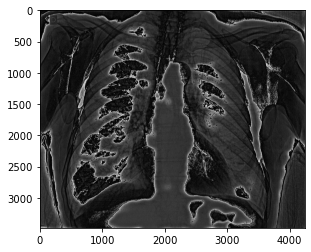

In [68]:
plt.imshow(im)

In [69]:
def draw_keypoints(vis, keypoints, color = (0, 255, 255)):
    for kp in keypoints:
            x, y = kp.pt
            plt.imshow(cv2.circle(vis, (int(x), int(y)), 2, color))

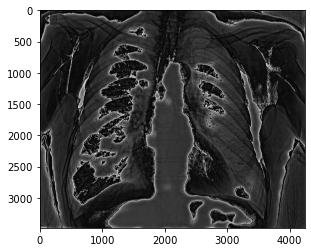

In [70]:
kp = sift.detect(im,None)
kp, des = sift.compute(im, kp)
img=draw_keypoints(im,kp)

In [71]:
for image_pat in image_paths:
    im=cv2.imread(image_pat)
    kp=sift.detect(im,None)
    keypoints,descriptor= sift.compute(im, kp)
    des_list.append((image_pat,descriptor))

In [72]:
descriptors=des_list[0][1]
for image_path,descriptor in des_list[1:]:
    descriptors=np.vstack((descriptors,descriptor))

In [73]:
descriptors.shape

(225494, 128)

In [74]:
descriptors_float=descriptors.astype(float)

In [75]:
from scipy.cluster.vq import kmeans,vq

In [76]:
k=200
voc,variance=kmeans(descriptors_float,k,1)

In [77]:
im_features=np.zeros((len(image_paths),k),"float32")
for i in range(len(image_paths)):
    words,distance=vq(des_list[i][1],voc)
    for w in words:
        im_features[i][w]+=1

In [78]:
from sklearn.preprocessing import StandardScaler
stdslr=StandardScaler().fit(im_features)
im_features=stdslr.transform(im_features)

In [79]:
des_list_test=[]

In [80]:
for image_pat in image_paths_test:
    image=cv2.imread(image_pat)
    kp=sift.detect(image,None)
    keypoints_test,descriptor_test= sift.compute(image, kp)
    des_list_test.append((image_pat,descriptor_test))

In [81]:
from scipy.cluster.vq import vq
test_features=np.zeros((len(image_paths_test),k),"float32")
for i in range(len(image_paths_test)):
    words,distance=vq(des_list_test[i][1],voc)
    for w in words:
        test_features[i][w]+=1

In [82]:
test_features

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 2.],
       [0., 0., 0., ..., 0., 1., 2.],
       ...,
       [0., 1., 0., ..., 2., 0., 2.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 4., 0., ..., 1., 0., 0.]], dtype=float32)

In [83]:
test_features=stdslr.transform(test_features)

In [84]:
y_test

(10,
 22,
 12,
 12,
 22,
 4,
 15,
 0,
 4,
 0,
 0,
 18,
 3,
 4,
 4,
 4,
 0,
 4,
 4,
 4,
 17,
 4,
 13,
 4,
 13,
 16,
 17,
 4,
 2,
 2,
 4,
 12,
 12,
 18,
 16,
 17,
 4,
 7,
 14,
 4,
 19,
 19,
 4,
 11,
 0,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 7,
 22,
 12,
 21,
 21,
 4,
 0,
 9,
 11,
 4,
 4,
 16,
 4,
 5,
 4,
 3,
 4,
 6,
 16,
 4,
 4,
 12,
 12,
 4,
 14,
 16,
 4,
 15,
 4,
 4,
 3,
 15,
 3,
 16,
 4,
 9,
 17,
 12,
 4,
 3,
 16,
 4,
 22,
 6,
 6,
 4,
 5,
 4,
 12,
 18,
 4,
 4,
 4,
 14,
 18,
 4,
 10,
 4,
 4,
 4,
 8,
 4,
 14,
 2,
 16,
 9,
 4,
 6,
 4,
 4,
 3,
 17,
 16,
 12,
 6,
 1,
 20,
 10,
 4,
 4,
 3,
 4,
 10,
 15,
 4,
 16,
 16,
 4,
 22,
 4,
 22,
 4,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 16,
 6,
 4,
 17,
 2,
 4,
 0,
 4,
 4,
 6,
 15,
 4,
 4,
 4,
 17)

In [85]:
import xgboost as xgb

In [86]:
from sklearn.metrics import accuracy_score
clf = xgb.XGBClassifier()
clf.fit(im_features,np.array(y_train))

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [87]:
y_pred=clf.predict(test_features)

In [88]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.47928994082840237


In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         4
           3       0.33      0.12      0.18         8
           4       0.51      0.97      0.67        72
           5       0.00      0.00      0.00         2
           6       0.33      0.14      0.20         7
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       1.00      0.33      0.50         3
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         2
          12       0.25      0.20      0.22        10
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         5
          16       0.67      0.50      0.57        12
          17       0.00    

C:\Users\D. RHUTHVIK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\D. RHUTHVIK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\D. RHUTHVIK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import SGDClassifier

In [91]:
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(im_features,np.array(y_train))

RandomForestClassifier()

In [92]:
y_pred=clf.predict(test_features)

In [93]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.46153846153846156


In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         8
           4       0.46      1.00      0.63        72
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00        10
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         5
          16       0.60      0.50      0.55        12
          17       0.00    

C:\Users\D. RHUTHVIK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\D. RHUTHVIK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\D. RHUTHVIK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
